## Capstone Project - New Private School in Toronto

In [203]:
# Importing Python libraries
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium

In [204]:
# Foursquare client and search settings
CLIENT_ID = 'E3C4CQTCLLZMXFZ4TFIZCVGU3C410AMUELWCXQXIHZG2UWKO'
CLIENT_SECRET = 'UV42ONRLWSGQFYXWREGWKNRUXFQG4W2CGTASTJZKGGSJ54QJ'
CATEGORY_ID = '52e81612bcbc57f1066b7a46'
VERSION = '20180604'
radius = 6000 
LIMIT = 20

In [205]:
# Read in the Wikipedia page on Toronto neighbourhoods
toronto_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]

# 'Clean' the data by dropping all rows with 'Not assigned' in the Borough column
toronto_df.drop(toronto_df[toronto_df['Borough'] == "Not assigned"].index, inplace=True)

In [206]:
#Check if there are Neighborhoods with value 'Not assigned'
toronto_df[toronto_df['Neighborhood'].str.match('Not assigned')]

# Sort and reset index
toronto_df.sort_values(by='Postal Code', axis=0, ascending=True, inplace=True)
toronto_df = toronto_df.reset_index(drop=True)

In [207]:
# List information on Toronto Boroughs and Neighbourhoods
toronto_df

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


In [208]:
# Input Toronto geolocation information (latitidue/longitude)
toronto_pc = pd.read_csv('http://cocl.us/Geospatial_data')

In [209]:
# Merge Toronto postal codes with their latitude and longitude in a Pandas dataframe
toronto_gc = pd.merge(toronto_df, toronto_pc, how='left', left_on='Postal Code', right_on='Postal Code')

In [210]:
# List the merged information
toronto_gc

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


In [211]:
# Convert dataframe to an array
toronto_array = toronto_gc.to_numpy()


In [213]:
# Look across all rows of the array

number_ps = np.empty(0)
school_loc = pd.DataFrame()

for i in range(len(toronto_array)):
    latitude = toronto_array[i][3]
    longitude = toronto_array[i][4]

    # Construct the URL
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, CATEGORY_ID, radius, LIMIT)
    results = requests.get(url).json()
    get_result = results['response']['venues']
    temp_df = pd.json_normalize(get_result)
    school_loc = school_loc.append(temp_df)
    number_ps = np.append(number_ps,len(temp_df.index))

number_ps

array([ 1.,  0.,  1.,  3.,  4.,  2.,  2.,  4.,  2.,  2.,  6.,  6.,  8.,
       10.,  8., 10.,  0.,  8., 10.,  7.,  6.,  6.,  6.,  4.,  5.,  7.,
        5.,  4.,  5.,  5.,  3.,  4.,  5.,  4.,  3.,  4.,  5.,  2.,  5.,
        6.,  5.,  5.,  2.,  4.,  6.,  6.,  5.,  7.,  8.,  7.,  8.,  5.,
        7.,  5.,  7.,  7.,  5.,  6.,  7.,  6.,  7.,  7.,  7.,  9.,  8.,
        6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  8.,  8.,  7.,  7.,  6.,
        6.,  6.,  7.,  5.,  6.,  6.,  6.,  6.,  2.,  3.,  4.,  3.,  5.,
        5.,  4.,  4.,  3.,  3.,  2.,  4.,  4.,  2.,  2.,  2.,  2.])

In [214]:
# Converting the array and adding to the dataframe as a new column "Number of Schools"
toronto_gc['Number of Schools'] = number_ps.astype(int).tolist()
toronto_gc

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Number of Schools
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,1
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,1
3,M1G,Scarborough,Woburn,43.770992,-79.216917,3
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,4
...,...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188,4
99,M9P,Etobicoke,Westmount,43.696319,-79.532242,2
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724,2
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,2


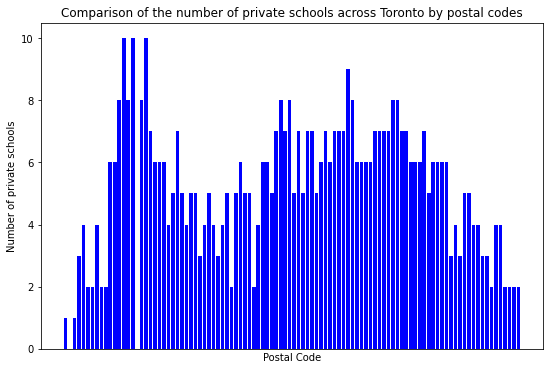

In [230]:
# Showing the results in a bar chart
plt.figure(figsize = (9, 6))
plt.bar("Postal Code", "Number of Schools", data = toronto_gc, color = "blue")
plt.xticks([])
plt.xlabel("Postal Code")
plt.ylabel("Number of private schools")
plt.title("Comparison of the number of private schools across Toronto by postal codes")
plt.show()

In [220]:
# List all the private schools fetched from Foursquare
school_loc

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood
0,5c929fd50868a2002ca71d60,Royal Crown Academic School,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",v-1592823180,False,4620 Finch Avenue East,Finch Ave. East & Brimley Rd.,43.806477,-79.276019,"[{'label': 'display', 'lat': 43.806477, 'lng':...",6560,M1S 4G2,CA,Scarborough,ON,Canada,[4620 Finch Avenue East (Finch Ave. East & Bri...,NaN
0,5c19204228374e002cd873a9,Psi Testing Centre,"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...",v-1592823182,False,NaN,NaN,43.734078,-79.259488,"[{'label': 'display', 'lat': 43.734078, 'lng':...",6570,M1K 5L7,CA,Toronto,ON,Canada,"[Toronto ON M1K 5L7, Canada]",NaN
0,5c19204228374e002cd873a9,Psi Testing Centre,"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...",v-1592823182,False,NaN,NaN,43.734078,-79.259488,"[{'label': 'display', 'lat': 43.734078, 'lng':...",5348,M1K 5L7,CA,Toronto,ON,Canada,"[Toronto ON M1K 5L7, Canada]",NaN
1,5c929fd50868a2002ca71d60,Royal Crown Academic School,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",v-1592823182,False,4620 Finch Avenue East,Finch Ave. East & Brimley Rd.,43.806477,-79.276019,"[{'label': 'display', 'lat': 43.806477, 'lng':...",6177,M1S 4G2,CA,Scarborough,ON,Canada,[4620 Finch Avenue East (Finch Ave. East & Bri...,NaN
2,54c7de02498edeaa80b29139,Marilake Education Centre,"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...",v-1592823182,False,NaN,NaN,43.803384,-79.286756,"[{'label': 'display', 'lat': 43.803384, 'lng':...",6670,NaN,CA,NaN,NaN,Canada,[Canada],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,54625600498e610d0aa09b81,Nile Academy,"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...",v-1592823234,False,NaN,NaN,43.744708,-79.558141,"[{'label': 'display', 'lat': 43.74470780278766...",6217,NaN,CA,NaN,NaN,Canada,[Canada],NaN
0,534c260d498ef8c98102e0c3,Nile Academy,"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...",v-1592823234,False,NaN,NaN,43.746334,-79.557718,"[{'label': 'display', 'lat': 43.74633442527875...",2587,NaN,CA,NaN,NaN,Canada,[Canada],NaN
1,54625600498e610d0aa09b81,Nile Academy,"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...",v-1592823234,False,NaN,NaN,43.744708,-79.558141,"[{'label': 'display', 'lat': 43.74470780278766...",2506,NaN,CA,NaN,NaN,Canada,[Canada],NaN
0,534c260d498ef8c98102e0c3,Nile Academy,"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...",v-1592823235,False,NaN,NaN,43.746334,-79.557718,"[{'label': 'display', 'lat': 43.74633442527875...",5288,NaN,CA,NaN,NaN,Canada,[Canada],NaN


In [221]:
# Fetching the population data from Statistics Canada
neighbor_profile = pd.read_csv("https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/hlt-fst/pd-pl/Tables/File.cfm?T=1201&SR=1&RPP=9999&PR=0&CMA=0&CSD=0&S=22&O=A&Lang=Eng&OFT=CSV", encoding = "ISO-8859-1")
neighbor_profile

,Geographic code,Geographic name,Province or territory,"Incompletely enumerated Indian reserves and Indian settlements, 2016","Population, 2016","Total private dwellings, 2016","Private dwellings occupied by usual residents, 2016"
0,01,Canada,NaN,T,35151728.0,15412443.0,14072079.0
1,A0A,A0A,Newfoundland and Labrador,NaN,46587.0,26155.0,19426.0
2,A0B,A0B,Newfoundland and Labrador,NaN,19792.0,13658.0,8792.0
3,A0C,A0C,Newfoundland and Labrador,NaN,12587.0,8010.0,5606.0
4,A0E,A0E,Newfoundland and Labrador,NaN,22294.0,12293.0,9603.0
...,...,...,...,...,...,...,...
1644,"For further information, refer to: http://www1...",NaN,NaN,NaN,NaN,NaN,NaN
1645,"Source: Statistics Canada, 2016 Census of Popu...",NaN,NaN,NaN,NaN,NaN,NaN
1646,How to cite: Statistics Canada. 2017. Populati...,NaN,NaN,NaN,NaN,NaN,NaN
1647,Statistics Canada Catalogue no. 98-402-X201600...,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
# Doing data wrangling and keeping only the information for Toronto areas
neighbor_2016 = neighbor_profile[['Geographic code', 'Population, 2016']].iloc[895:997]
neighbor_2016.rename(columns={'Geographic code':'Postal Code'}, inplace=True)
neighbor_2016

,Postal Code,"Population, 2016"
895,M1B,66108.0
896,M1C,35626.0
897,M1E,46943.0
898,M1G,29690.0
899,M1H,24383.0
...,...,...
992,M9N,25074.0
993,M9P,20874.0
994,M9R,33743.0
995,M9V,55959.0


In [223]:
# Perform data cleansing - Postal Code M7R is missing population information from StatCan and will be removed
toronto_gc.drop(toronto_gc[toronto_gc['Postal Code'] == 'M7R'].index, inplace=True)

In [224]:
# List the dataframe
toronto_gc

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Number of Schools
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,1
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,1
3,M1G,Scarborough,Woburn,43.770992,-79.216917,3
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,4
...,...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188,4
99,M9P,Etobicoke,Westmount,43.696319,-79.532242,2
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724,2
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,2


In [225]:
# List the combined dataframe
toronto_pop = pd.merge(toronto_gc, neighbor_2016, on='Postal Code')
toronto_pop

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Number of Schools,"Population, 2016"
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,1,66108.0
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0,35626.0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,1,46943.0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,3,29690.0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,4,24383.0
...,...,...,...,...,...,...,...
97,M9N,York,Weston,43.706876,-79.518188,4,25074.0
98,M9P,Etobicoke,Westmount,43.696319,-79.532242,2,20874.0
99,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724,2,33743.0
100,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,2,55959.0


In [226]:
# List neighbourhoods with no private schools
toronto_pop[toronto_pop['Number of Schools'] == 0]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Number of Schools,"Population, 2016"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0,35626.0
16,M1X,Scarborough,Upper Rouge,43.836125,-79.205636,0,15097.0


In [227]:
# Next we will normalize the Population data to reduce the size difference
from sklearn.preprocessing import MinMaxScaler

columns_norm = ['Number of Schools', 'Population, 2016']
x = toronto_pop[columns_norm].values
MMS = MinMaxScaler()
x_scaled = MMS.fit_transform(x)
toronto_temp = pd.DataFrame(x_scaled, columns=columns_norm, index = toronto_pop.index)
toronto_pop[columns_norm] = toronto_temp
toronto_pop

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Number of Schools,"Population, 2016"
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0.1,0.871023
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0.0,0.469399
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.1,0.618509
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0.3,0.391188
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.4,0.321264
...,...,...,...,...,...,...,...
97,M9N,York,Weston,43.706876,-79.518188,0.4,0.330369
98,M9P,Etobicoke,Westmount,43.696319,-79.532242,0.2,0.275031
99,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724,0.2,0.444589
100,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,0.2,0.737302


In [228]:
# Finding the ratio of number of schools divided by the population of the area
toronto_pop['Ratio'] = toronto_pop['Number of Schools'] / toronto_pop['Population, 2016']
toronto_pop.sort_values(by=['Ratio'], ignore_index=True, inplace=True)
toronto_pop.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Number of Schools,"Population, 2016",Ratio
0,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0.0,0.469399,0.000000
1,M1X,Scarborough,Upper Rouge,43.836125,-79.205636,0.0,0.198914,0.000000
2,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0.1,0.871023,0.114808
3,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.1,0.618509,0.161679
4,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,0.2,0.737302,0.271259


In [229]:
# Visualizing these locations on a map
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) 

toronto_top5 = toronto_pop.head()

# add potential new school locations as a red circle mark
for latitude, longitude, label in zip(toronto_top5.Latitude, toronto_top5.Longitude, toronto_top5.Neighborhood):
    folium.CircleMarker(
        [latitude, longitude],
        radius=6,
        popup='New school',
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
        ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(school_loc['location.lat'], school_loc['location.lng'], school_loc['name']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map